In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\demo_data\demo_data\3.concertriccir2.csv",header=None)

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
data.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
data.shape

(500, 3)

In [6]:
data.duplicated().sum()

0

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

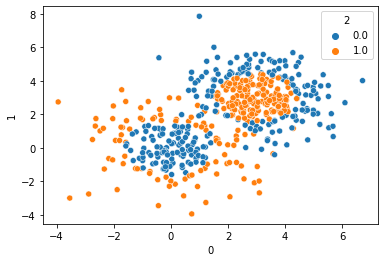

In [7]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.1,random_state=42)

In [9]:
X_train.shape,X_test.shape

((450, 2), (50, 2))

In [10]:
y_train.shape, y_test.shape

((450,), (50,))

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)
X_test_tr = scale.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
model = Sequential()

model.add(Dense(10,activation="relu",input_dim=2))

model.add(Dense(8,activation="relu"))


model.add(Dense(6,activation="relu"))

model.add(Dense(4,activation="relu"))

model.add(Dense(2,activation="relu"))


model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 213
Trainable params: 213
Non-trainable pa

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
history = model.fit(X_train_tr,y_train,epochs=850,batch_size=12,validation_split=0.2)

Epoch 1/850
30/30 [==============================] - 1s 9ms/step - loss: 0.6993 - accuracy: 0.5111 - val_loss: 0.6998 - val_accuracy: 0.4778
Epoch 2/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5444 - val_loss: 0.6959 - val_accuracy: 0.6000
Epoch 3/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5944 - val_loss: 0.6937 - val_accuracy: 0.6222
Epoch 4/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6250 - val_loss: 0.6919 - val_accuracy: 0.5889
Epoch 5/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5833 - val_loss: 0.6898 - val_accuracy: 0.6333
Epoch 6/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5917 - val_loss: 0.6879 - val_accuracy: 0.5778
Epoch 7/850
30/30 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.6056 - val_loss: 0.6852 - val_accuracy: 0.6111
Epoch 8/850
3

In [17]:
y_cap=model.predict(X_test_tr)

2/2 [==============================] - 0s 0s/step


In [18]:
y_capf=np.where(y_cap>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.94

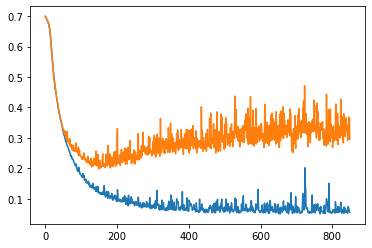

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [21]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

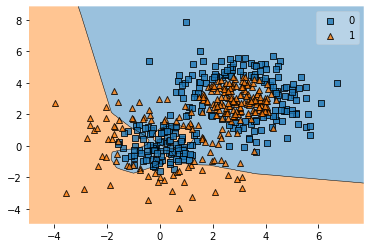

In [22]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

In [23]:
y_capf

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

3888/3888 [==============================] - 5s 1ms/step


<AxesSubplot:>

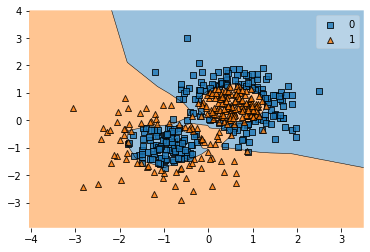

In [24]:
plot_decision_regions(X_train_tr,y_train.values.astype(int),clf=model)

7776/7776 [==============================] - 10s 1ms/step


<AxesSubplot:>

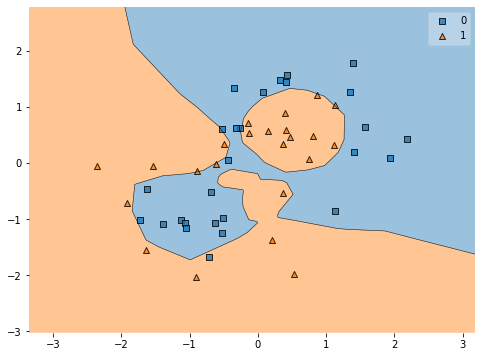

In [25]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test_tr,y_test.values.astype(int),clf=model)